### Description

With this notebook we are trying to have a glance at the health status of the Real Estate Market in Miami-Dade and Broward counties.

**Method Outline**
* Analyse Total Listings in Miami-Dade and Broward
* Analyse Total Home Sales in Miami-Dade and Broward
* Calculate Months of Inventory as the relation between **listings** and **sales** and analyse results
    * Months of inventory = total listings / total sales calculated on a monthly basis
* Analyse median number of days of the listings in Zillow
* Analyse median price across Top and Bottom price tiers
* Analyse the Sale to Listing Ratio

**Source:** https://www.zillow.com/research/data/

In [5]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl

### Total Listings

In [6]:
# Reading listings dataset
path = '../Data/zillow/MonthlyListings_NSA_AllHomes_County.csv'
listings_count = pd.read_csv(path)
listings_count.drop(columns = ['SizeRank', 'RegionID', 'StateName', 'RegionType'], inplace=True)
Counties = ['Miami-Dade County', 'Broward County']
listings_count = listings_count[listings_count['RegionName'].isin(Counties)]

In [7]:
listings_count.set_index('RegionName', inplace=True)
listings_count

2013-01  2013-02  2013-03  2013-04  2013-05  2013-06  \
RegionName                                                                
Miami-Dade County  21557.0  21131.0  23044.0  23721.0  20229.0  18983.0   
Broward County     19458.0  19779.0  21548.0  21975.0  19458.0  17654.0   

                   2013-07  2013-08  2013-09  2013-10  ...  2019-01  2019-02  \
RegionName                                             ...                     
Miami-Dade County  19871.0  20565.0  20295.0  22608.0  ...  25703.0  25399.0   
Broward County     18483.0  18608.0  17390.0  18790.0  ...  17707.0  17487.0   

                   2019-03  2019-04  2019-05  2019-06  2019-07  2019-08  \
RegionName                                                                
Miami-Dade County  25429.0  24950.0  25381.0  23616.0  24109.0  23128.0   
Broward County     17496.0  17149.0  17604.0  16050.0  16635.0  15327.0   

                   2019-09  2019-10  
RegionName                           
Miami-Dade County  22691.0  23612.0  
Broward County     14914.0  15699.0  

[2 rows x 82 columns]

Text(0.5, 1.0, 'Total Listings in Miami-Dade and Broward')

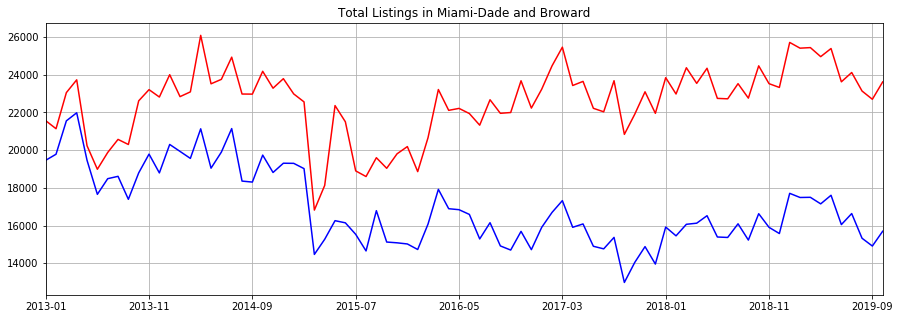

In [8]:
fig, ax = plt.subplots(figsize=(15,5))
dade_listings = listings_count.loc['Miami-Dade County']
broward_listings = listings_count.loc['Broward County']
dade_listings.plot(label = 'Miami-Dade', color = 'r', grid = True, ax = ax)
broward_listings.plot(label = 'Broward', color = 'b', grid = True, ax = ax)
ax.set_title('Total Listings in Miami-Dade and Broward')

### Total Home Sales

In [9]:
# Reading sales dataset
path = '../Data/zillow/Sale_Counts_County.csv'
sale_count = pd.read_csv(path)
sale_count.drop(columns = ['SizeRank', 'RegionID', 'StateName'], inplace=True)
Counties = ['Miami-Dade County', 'Broward County']
sale_count = sale_count[sale_count['RegionName'].isin(Counties)]

In [10]:
sale_count.set_index('RegionName', inplace=True)

In [11]:
sale_count

2008-03  2008-04  2008-05  2008-06  2008-07  2008-08  \
RegionName                                                                
Miami-Dade County   1594.0   1608.0   1668.0   1695.0   1784.0   1674.0   
Broward County      1715.0   2082.0   1940.0   1982.0   2125.0   1799.0   

                   2008-09  2008-10  2008-11  2008-12  ...  2019-01  2019-02  \
RegionName                                             ...                     
Miami-Dade County   1614.0   1843.0   1479.0   2101.0  ...   2773.0   2694.0   
Broward County      2045.0   2111.0   1451.0   1871.0  ...   2763.0   2698.0   

                   2019-03  2019-04  2019-05  2019-06  2019-07  2019-08  \
RegionName                                                                
Miami-Dade County   3267.0   3531.0   4008.0   3412.0   3994.0   3408.0   
Broward County      3557.0   4114.0   4630.0      NaN      NaN      NaN   

                   2019-09  2019-10  
RegionName                           
Miami-Dade County   3283.0   3032.0  
Broward County         NaN      NaN  

[2 rows x 140 columns]

Text(0.5, 1.0, 'Total Sales in Miami-Dade and Broward')

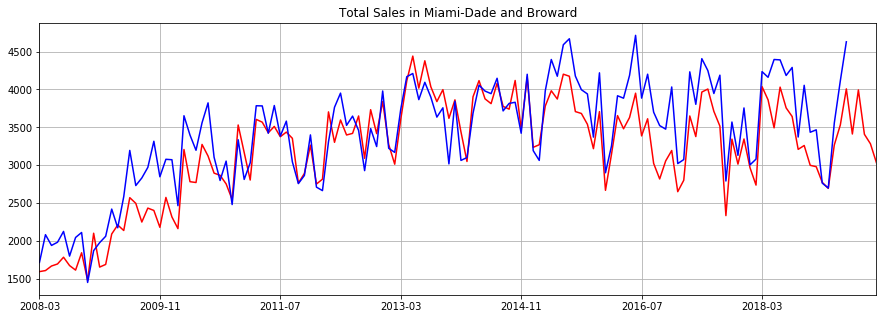

In [12]:
fig, ax = plt.subplots(figsize=(15,5))
dade_sales = sale_count.loc['Miami-Dade County']
broward_sales = sale_count.loc['Broward County']
dade_sales.plot(label = 'Miami-Dade', color = 'r', grid = True, ax = ax)
broward_sales.plot(label = 'Broward', color = 'b', grid = True, ax = ax)
ax.set_title('Total Sales in Miami-Dade and Broward')

### Months of inventory

In [13]:
ratio = listings_count / sale_count # Months of Inventory

In [14]:
ratio

2008-03  2008-04  2008-05  2008-06  2008-07  2008-08  \
RegionName                                                                
Miami-Dade County      NaN      NaN      NaN      NaN      NaN      NaN   
Broward County         NaN      NaN      NaN      NaN      NaN      NaN   

                   2008-09  2008-10  2008-11  2008-12  ...   2019-01  \
RegionName                                             ...             
Miami-Dade County      NaN      NaN      NaN      NaN  ...  9.269023   
Broward County         NaN      NaN      NaN      NaN  ...  6.408614   

                    2019-02   2019-03   2019-04   2019-05   2019-06   2019-07  \
RegionName                                                                      
Miami-Dade County  9.427988  7.783594  7.065987  6.332585  6.921454  6.036304   
Broward County     6.481468  4.918752  4.168449  3.802160       NaN       NaN   

                    2019-08   2019-09   2019-10  
RegionName                                       
Miami-Dade County  6.786385  6.911666  7.787599  
Broward County          NaN       NaN       NaN  

[2 rows x 140 columns]

In [15]:
ratio.drop(ratio.iloc[:, 0:58], inplace = True, axis = 1) # Drop the first 58 columns

Text(0.5, 1.0, 'Months of Inventory in Miami-Dade and Broward')

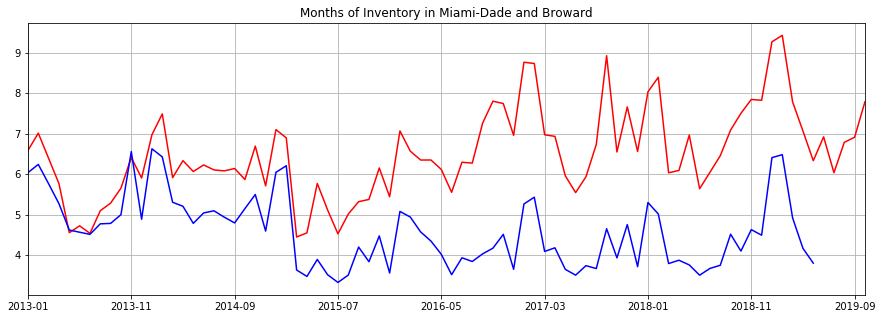

In [16]:
fig, ax = plt.subplots(figsize=(15,5))
dade_ratio = ratio.loc['Miami-Dade County']
broward_ratio = ratio.loc['Broward County']
dade_ratio.plot(label = 'Miami-Dade', color = 'r', grid = True, ax = ax)
broward_ratio.plot(label = 'Broward', color = 'b', grid = True, ax = ax)
ax.set_title('Months of Inventory in Miami-Dade and Broward')

<div class="alert alert-block alert-success">
<b>Comment:</b><br>As a general rule, 5 to 6 months of inventory is considered to be a normal or balanced market. <br>Over 6 months of inventory and we have buyer's market.Less than 5 months and we have a seller's market. <br>The smaller the available inventory, the tighter the market is.
</div>

### Median Days in Zillow

In [17]:
# Reading dataset with number of days in Zillow of the listings
path = '../Data/zillow/DaysOnZillow_County.csv'
days = pd.read_csv(path)
days.drop(columns = ['SizeRank', 'RegionID', 'RegionType', 'StateName'], inplace=True)
Counties = ['Miami-Dade County', 'Broward County']
days = days[days['RegionName'].isin(Counties)]

In [18]:
days.set_index('RegionName', inplace=True)

In [37]:
days

2010-01  2010-02  2010-03  2010-04  2010-05  2010-06  \
RegionName                                                                
Miami-Dade County    202.0    178.0    195.0    188.0    166.0    119.0   
Broward County       170.0    170.0    145.0    147.0    139.0    126.0   

                   2010-07  2010-08  2010-09  2010-10  ...  2018-12  2019-01  \
RegionName                                             ...                     
Miami-Dade County    103.5     93.0    103.0    102.0  ...    110.0    118.0   
Broward County       109.0    106.0    107.0    110.0  ...     93.0    105.0   

                   2019-02  2019-03  2019-04  2019-05  2019-06  2019-07  \
RegionName                                                                
Miami-Dade County    118.0    119.0    111.0    116.0    112.0    109.0   
Broward County       103.0     97.0     93.0     96.0     90.0     92.0   

                   2019-08  2019-09  
RegionName                           
Miami-Dade County    107.0    113.0  
Broward County        92.0     96.0  

[2 rows x 117 columns]

Text(0.5, 1.0, 'Median Number of days listings stay in Zillow in Miami-Dade and Broward')

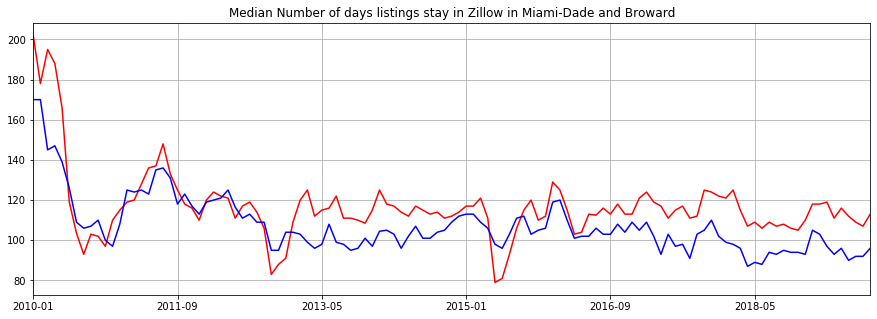

In [47]:
fig, ax = plt.subplots(figsize=(15,5))
dade = days.loc['Miami-Dade County']
broward = days.loc['Broward County']
dade.plot(label = 'Miami-Dade', color = 'r', grid = True, ax = ax)
broward.plot(label = 'Broward', color = 'b', grid = True, ax = ax)
ax.set_title('Median Number of days listings stay in Zillow in Miami-Dade and Broward')

<div class="alert alert-block alert-success">
<b>Comment:</b><br>When days on market exceed 90 days, it’s a sign that either there is something wrong with the property or it is priced too high for the market.
</div>

### Median Price

In [33]:
# Reading dataset with median listing price - Top Tier
path = '../Data/zillow/County_MedianListingPrice_TopTier.csv'
price_top = pd.read_csv(path, encoding = 'latin-1')
price_top.drop(columns = ['SizeRank', 'State', 'Metro', 'StateCodeFIPS', 'MunicipalCodeFIPS'], inplace=True)
Counties = ['Miami-Dade County', 'Broward County']
price_top = price_top[price_top['RegionName'].isin(Counties)]

In [ ]:
# Reading dataset with median listing price - Bottom Tier
path = '../Data/zillow/County_MedianListingPrice_BottomTier.csv'
price_bottom = pd.read_csv(path, encoding = 'latin-1')
price_bottom.drop(columns = ['SizeRank', 'State', 'Metro', 'StateCodeFIPS', 'MunicipalCodeFIPS'], inplace=True)
Counties = ['Miami-Dade County', 'Broward County']
price_bottom = price_bottom[price_bottom['RegionName'].isin(Counties)]

In [35]:
price_top.set_index('RegionName', inplace=True)


In [36]:
price_top

2010-01   2010-02   2010-03   2010-04   2010-05   2010-06  \
RegionName                                                                      
Miami-Dade County  499000.0  499000.0  491787.5  479000.0  475000.0  469900.0   
Broward County     409000.0  405000.0  399000.0  395000.0  397000.0  395000.0   

                    2010-07   2010-08   2010-09   2010-10  ...   2019-01  \
RegionName                                                 ...             
Miami-Dade County  465000.0  468000.0  459900.0  459000.0  ...  708500.0   
Broward County     399000.0  397000.0  389900.0  395000.0  ...  599900.0   

                    2019-02   2019-03   2019-04   2019-05   2019-06   2019-07  \
RegionName                                                                      
Miami-Dade County  700000.0  705000.0  700000.0  699000.0  699000.0  699000.0   
Broward County     599900.0  599900.0  599000.0  595000.0  595000.0  595000.0   

                    2019-08   2019-09   2019-10  
RegionName                                       
Miami-Dade County  699000.0  698000.0  699000.0  
Broward County     599000.0  599000.0  599000.0  

[2 rows x 118 columns]

In [39]:
# Reading dataset with number of days in Zillow of the listings
path = '../Data/zillow/County_MedianListingPrice_BottomTier.csv'
price_bottom = pd.read_csv(path, encoding = 'latin-1')
price_bottom.drop(columns = ['SizeRank', 'State', 'Metro', 'StateCodeFIPS', 'MunicipalCodeFIPS'], inplace=True)
Counties = ['Miami-Dade County', 'Broward County']
price_bottom = price_bottom[price_bottom['RegionName'].isin(Counties)]

In [40]:
price_bottom.set_index('RegionName', inplace=True)

In [41]:
price_bottom

2010-01  2010-02  2010-03  2010-04  2010-05  2010-06  \
RegionName                                                                
Miami-Dade County  69900.0  68000.0  68000.0  68000.0  67000.0  65000.0   
Broward County     62000.0  60000.0  60000.0  60000.0  60000.0  59999.5   

                   2010-07  2010-08  2010-09  2010-10  ...   2019-01  \
RegionName                                             ...             
Miami-Dade County  65000.0  65800.0  65000.0  65000.0  ...  167000.0   
Broward County     60000.0  60000.0  60000.0  59999.0  ...  136849.5   

                    2019-02   2019-03   2019-04   2019-05   2019-06   2019-07  \
RegionName                                                                      
Miami-Dade County  168000.0  169000.0  169000.0  169000.0  169000.0  168500.0   
Broward County     135000.0  137000.0  139000.0  137000.0  135500.0  136000.0   

                    2019-08   2019-09   2019-10  
RegionName                                       
Miami-Dade County  168000.0  169000.0  169900.0  
Broward County     137000.0  139000.0  139000.0  

[2 rows x 118 columns]

Text(0.5, 1.0, 'Median Listing Prices - Top Tier')

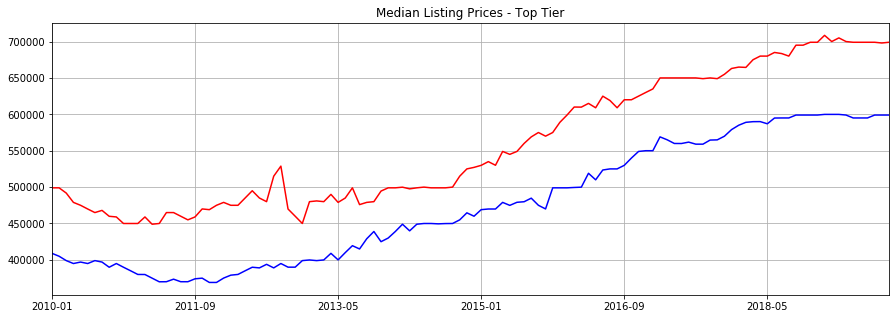

In [46]:
fig, ax = plt.subplots(figsize=(15,5))
dade = price_top.loc['Miami-Dade County']
broward = price_top.loc['Broward County']
dade.plot(label = 'Miami-Dade', color = 'r', grid = True, ax = ax)
broward.plot(label = 'Broward', color = 'b', grid = True, ax = ax)
ax.set_title('Median Listing Prices - Top Tier')

Text(0.5, 1.0, 'Median Listing Prices - Bottom Tier')

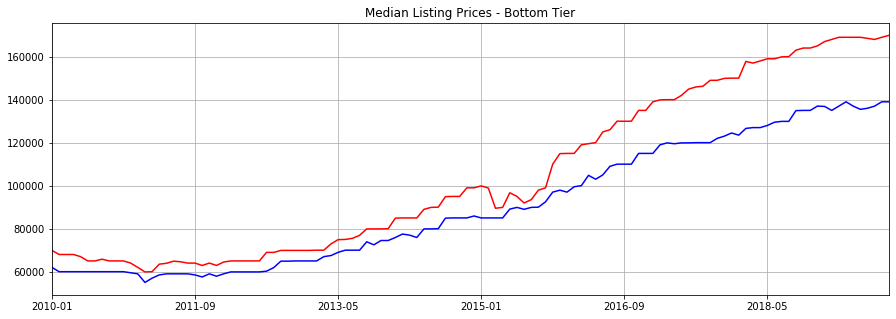

In [45]:
fig, ax = plt.subplots(figsize=(15,5))
dade = price_bottom.loc['Miami-Dade County']
broward = price_bottom.loc['Broward County']
dade.plot(label = 'Miami-Dade', color = 'r', grid = True, ax = ax)
broward.plot(label = 'Broward', color = 'b', grid = True, ax = ax)
ax.set_title('Median Listing Prices - Bottom Tier')

<div class="alert alert-block alert-success">
<b>Comment:</b><br>We observe a rather steep price increment during the last 6 years that seems to stabilize in the last year. <br>Bottom-Tier properties in Miami-Dade County have increased their value at a higher rate than properties in Broward County.
</div>

### Sale to Listing ratio

In [49]:
# Reading inventory dataset
path = '../Data/zillow/SaleToListRatio_County.csv'
sale_listing_ratio = pd.read_csv(path)
sale_listing_ratio.drop(columns = ['SizeRank'], inplace=True)
Counties = ['Miami-Dade County', 'Broward County']
sale_listing_ratio = sale_listing_ratio[sale_listing_ratio['RegionName'].isin(Counties)]

In [51]:
sale_listing_ratio.set_index('RegionName')

RegionID RegionType StateName   2010-01   2010-02  \
RegionName                                                             
Miami-Dade County      2964     County        FL  0.865679  0.861185   
Broward County         1561     County        FL  0.884872  0.873016   

                    2010-03   2010-04   2010-05   2010-06   2010-07  ...  \
RegionName                                                           ...   
Miami-Dade County  0.854977  0.860021  0.865922  0.894309  0.913057  ...   
Broward County     0.888709  0.889813  0.908194  0.907692  0.913556  ...   

                    2018-12   2019-01   2019-02   2019-03  2019-04   2019-05  \
RegionName                                                                     
Miami-Dade County  0.935065  0.934400  0.928841  0.935065  0.93750  0.933482   
Broward County     0.942415  0.939188  0.937500  0.945170  0.94223  0.946518   

                    2019-06   2019-07   2019-08   2019-09  
RegionName                                                 
Miami-Dade County  0.936170  0.941176  0.941176  0.939828  
Broward County     0.950538  0.948150  0.949323  0.947899  

[2 rows x 120 columns]

In [52]:
sale_listing_ratio.drop(columns = ['RegionID', 'RegionType', 'StateName'], inplace=True)
sale_listing_ratio = sale_listing_ratio.set_index('RegionName')

In [53]:
sale_listing_ratio

2010-01   2010-02   2010-03   2010-04   2010-05   2010-06  \
RegionName                                                                      
Miami-Dade County  0.865679  0.861185  0.854977  0.860021  0.865922  0.894309   
Broward County     0.884872  0.873016  0.888709  0.889813  0.908194  0.907692   

                    2010-07   2010-08   2010-09   2010-10  ...   2018-12  \
RegionName                                                 ...             
Miami-Dade County  0.913057  0.918082  0.913043  0.911845  ...  0.935065   
Broward County     0.913556  0.914787  0.914157  0.918721  ...  0.942415   

                    2019-01   2019-02   2019-03  2019-04   2019-05   2019-06  \
RegionName                                                                     
Miami-Dade County  0.934400  0.928841  0.935065  0.93750  0.933482  0.936170   
Broward County     0.939188  0.937500  0.945170  0.94223  0.946518  0.950538   

                    2019-07   2019-08   2019-09  
RegionName                                       
Miami-Dade County  0.941176  0.941176  0.939828  
Broward County     0.948150  0.949323  0.947899  

[2 rows x 117 columns]

Text(0.5, 1.0, 'Sale price to Listing price Ratio : Miami-Dade and Broward')

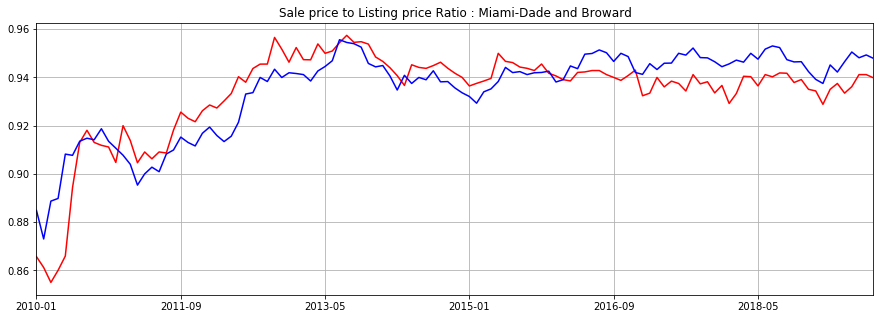

In [54]:
fig, ax = plt.subplots(figsize=(15,5))
dade_listing = sale_listing_ratio.loc['Miami-Dade County']
broward_listing = sale_listing_ratio.loc['Broward County']
dade_listing.plot(label = 'Miami-Dade', color = 'r', grid = True, ax = ax)
broward_listing.plot(label = 'Broward', color = 'b',grid = True, ax = ax)
ax.set_title('Sale price to Listing price Ratio : Miami-Dade and Broward')

<div class="alert alert-block alert-success">
<b>Comment:</b><br>We observe that owners tend to ask for ~5% above the final sale price in order to have room to negociate.<br>In Miami-Dade that margin is even more pronounced.
</div>